<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook_2025/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio

In [2]:
f = '26.wav'

sampling rate: 48000 Hz
shape of data: (316160, 2)
duration of data: 6.586666666666667 s
samples of data: 316160 samples


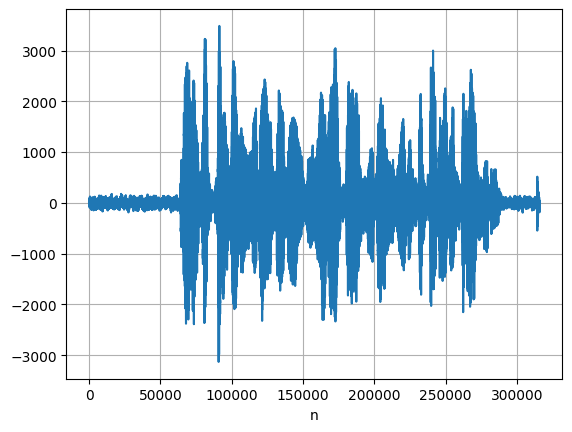

In [3]:
fs, d = wavfile.read(f)
print(f"sampling rate: {fs} Hz")
print(f"shape of data: {d.shape}")
if len(d.shape)==2:
    wav = np.array(d[:,0])
elif len(d.shape)==1:
    wav = np.array(d)
L = len(d)
print(f"duration of data: {L/fs} s")
print(f"samples of data: {L} samples")
plt.plot(wav)
plt.xlabel('n')
plt.grid('on')
plt.show()
Audio(wav,rate=fs)

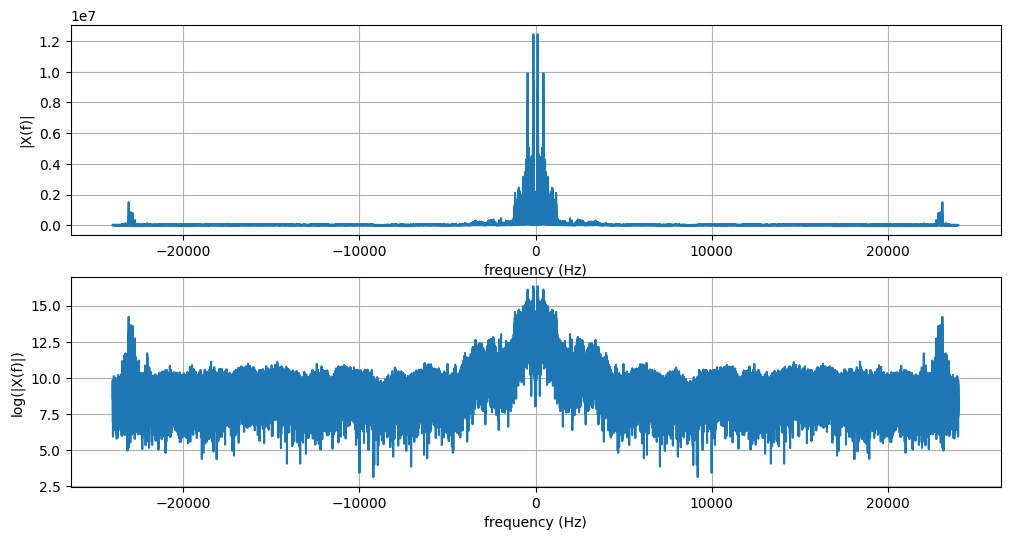

In [4]:
F = np.fft.fftshift(np.fft.fft(wav))

freq = (np.arange(len(wav))- 0.5*len(wav))*(fs/len(wav))
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(freq,np.abs(F))
plt.xlabel('frequency (Hz)')
plt.ylabel('|X(f)|')
plt.grid('on')
plt.subplot(212)
plt.plot(freq,np.log(np.abs(F)))
plt.xlabel('frequency (Hz)')
plt.ylabel('log(|X(f)|)')
plt.grid('on')
plt.show()

## ideal lowpass filter



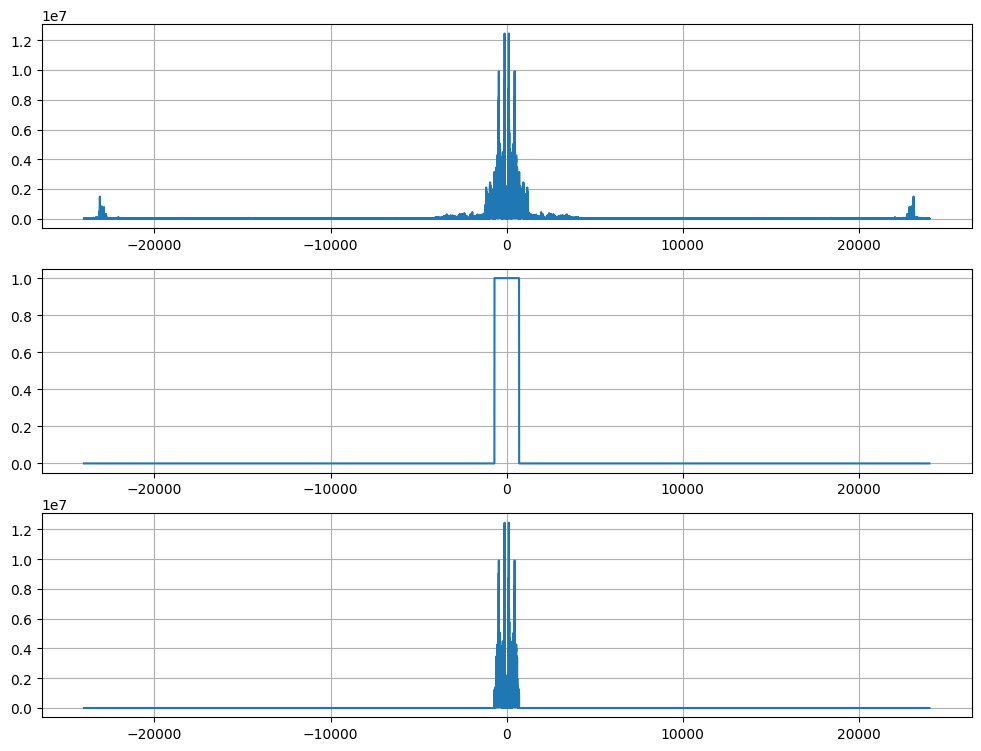

In [5]:
wc = 700
F_lpf = F.copy()
LPF = np.ones_like(F_lpf)
LPF[np.abs(freq)>wc]=0
F_lpf = F_lpf*LPF
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(freq,np.abs(F))
plt.grid('on')
plt.subplot(312)
plt.plot(freq,np.abs(LPF))
plt.grid('on')
plt.subplot(313)
plt.plot(freq,np.abs(F_lpf))
plt.grid('on')
plt.show()

In [6]:
wav_lpf = np.fft.ifft(np.fft.fftshift(F_lpf))
Audio(wav_lpf,rate=fs)

/usr/local/lib/python3.11/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## ideal highpass filter

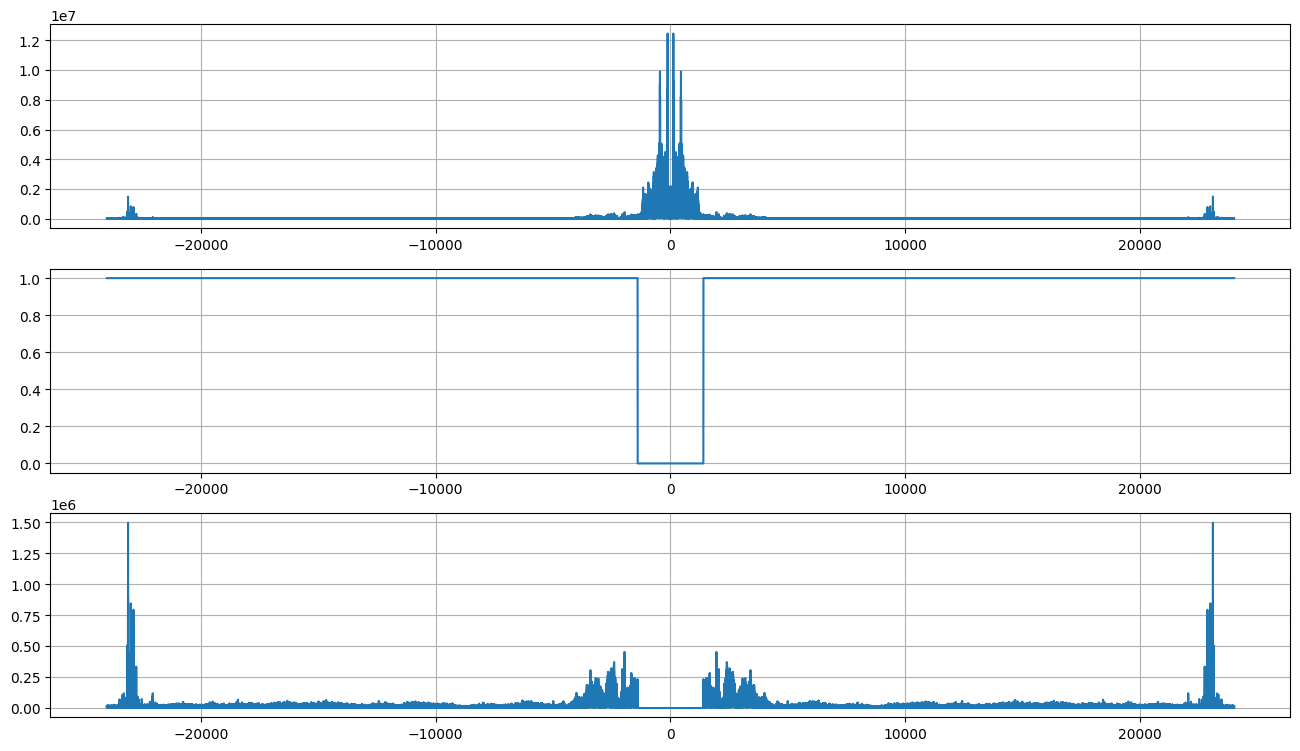

In [7]:
wc = 1400
F_hpf = F.copy()
HPF = np.ones_like(F_hpf)
HPF[np.abs(freq)<wc]=0
F_hpf = F_hpf*HPF
plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(freq,np.abs(F))
plt.grid('on')
plt.subplot(312)
plt.plot(freq,np.abs(HPF))
plt.grid('on')
plt.subplot(313)
plt.plot(freq,np.abs(F_hpf))
plt.grid('on')
plt.show()

In [8]:
wav_hpf = np.fft.ifft(np.fft.fftshift(F_hpf))
Audio(wav_hpf,rate=fs)

## ideal bandpass filter

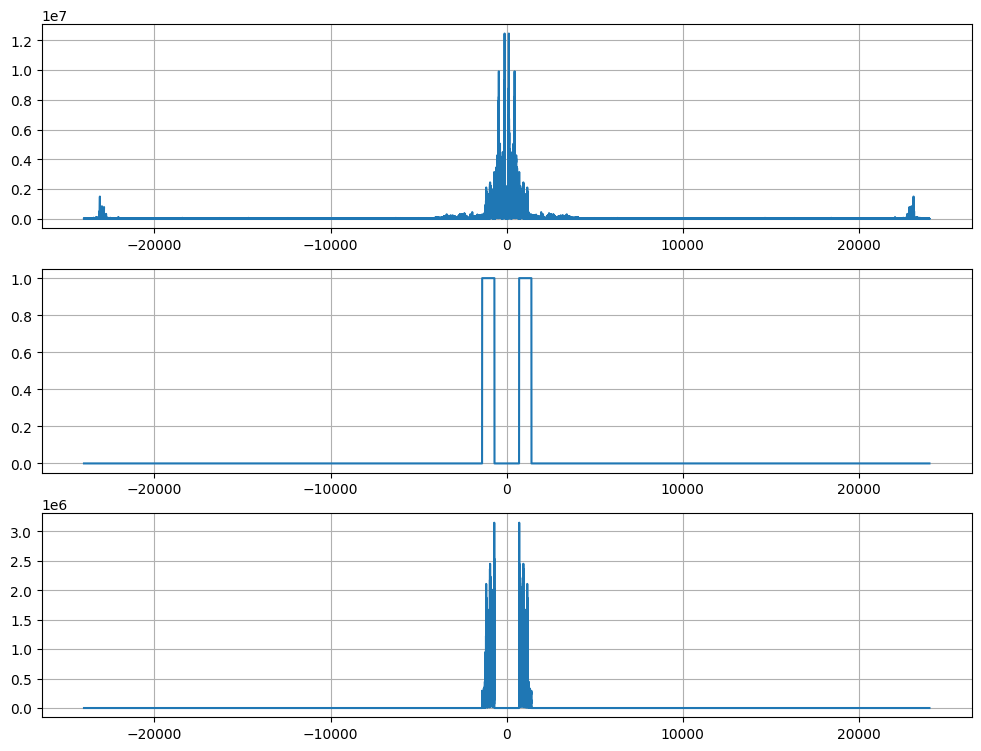

In [9]:
wc1 =700
wc2 =1400

F_bpf = F.copy()
BPF = np.ones_like(F_bpf)
BPF[np.abs(freq)<wc1]=0
BPF[np.abs(freq)>wc2]=0

F_bpf = F_bpf*BPF
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(freq,np.abs(F))
plt.grid('on')
plt.subplot(312)
plt.plot(freq,np.abs(BPF))
plt.grid('on')
plt.subplot(313)
plt.plot(freq,np.abs(F_bpf))
plt.grid('on')
plt.show()

In [10]:
wav_bpf = np.fft.ifft(np.fft.fftshift(F_bpf))
Audio(wav_bpf,rate=fs)

## shift in Frequency domain

shift: 4800 Hz


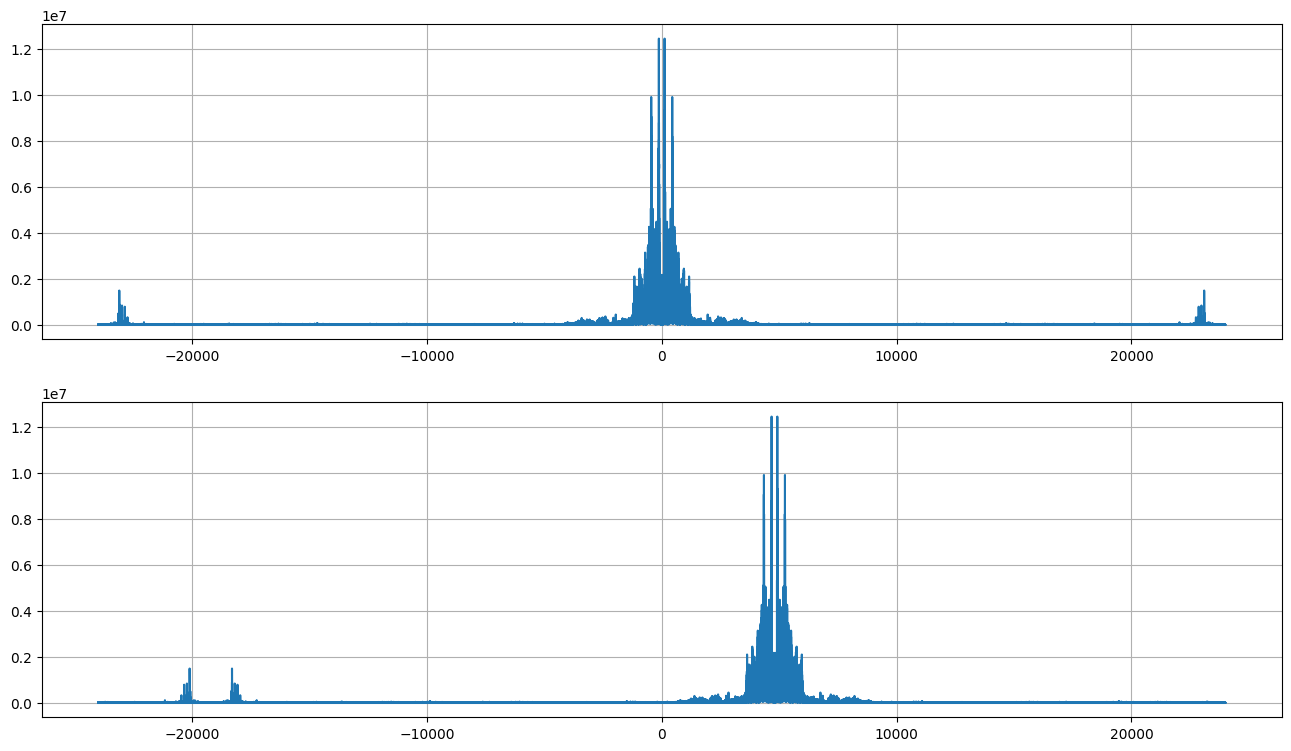

In [13]:
ws = 4800
print(f'shift: {ws} Hz')

ns = int(ws/(fs/len(wav)))
F_shift = np.roll(F.copy(),ns)
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(freq,np.abs(F))
plt.grid('on')
plt.subplot(212)
plt.plot(freq,np.abs(F_shift))
plt.grid('on')
plt.show()

In [14]:
wav_shift = np.fft.ifft(np.fft.fftshift(F_shift))
Audio(wav_shift,rate=fs)